<a href="https://colab.research.google.com/github/LucasMelvin15/Pytorch_deeplearning/blob/main/01_Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt #plotting and visualization of data

#check the version
torch.__version__


'2.3.0+cu121'

## Preparing and loading data

Data in machine learning can be anything
1. Spreadsheet
2. DNA

Two parts of machine learning
1. Convert the data into numerical representation
2. Create a model to learn the data ( patterns/ features/ weights/ numbers)

To showcase this create some *known* data using the linear regression formula
**Y = a + bX**

X is the independent variable that is used to predict Y which is the dependent variable. The gradient/ slope of the line is `b` and `a` is the  y intercept when value of X=0

We'll use the linear regression formula to make a straight line with known **parameters** (sth a model learns)

In [2]:
#Create known parameters
weight = 0.7 #gradient
bias= 0.3  # y intercept

#Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end , step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10] #show the first 10 values of each


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

## 1.Spliting data into training and test sets
  
  Test set - generalization( ability for a machine learning model to perform well on data it hasn't seen before)

In [4]:
#create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How to better visualize our data?


In [5]:
def plot_predictions (train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):

  #plots training data, test data and compares predictions


  plt.figure(figsize=(5,3.5))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});




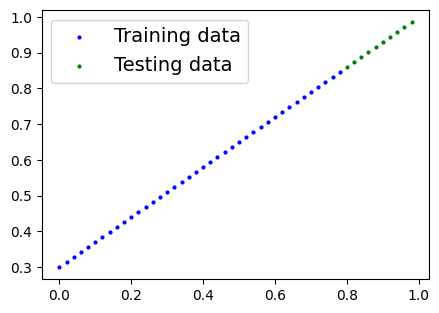

In [6]:
 plot_predictions();

##2. Build model

What the model does:
* Start with random values(weights and bias)
* Look at training data and adjust the random values to better represent (or get closer) to the ideal values(the weight and bias values we used to create the data)

How does it do so?
1. Gradient descent
2.Backpropagation

In [7]:
import torch
from torch import nn
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

### Pytorch model building essentials

* torch.nn - Contains all the building blocks for neural networks (computational graphs)
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it you should overwrite forward()
* torch.optim - this is where the optimizers in pytorch live, they will help with gradient descent. Contains various optimization algorithms
* def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.
computation in our case is a linear regression formula

## Checking the contents of our PyTorch model

We can check our model parameters or what's inside our model using `.parameters()`

In [8]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())





[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions with `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.
When we pass data through our model, it's going to run through the `forward()` method.

In [10]:
#Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)


y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [11]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

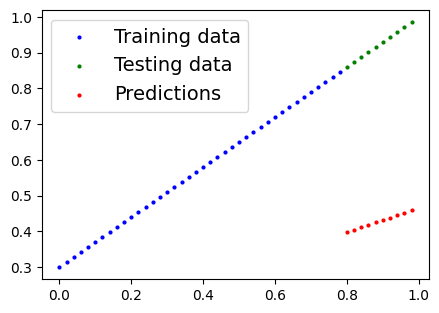

In [12]:
plot_predictions(predictions=y_preds)

## 3. Train Model
The whole idea of training is for the model to move from some `unknown` parameters(these may be random) to `known` parameters.ie better representation of data.

One way to measure how poor or wrong your models predictions are is to use a loss function.

Things we need to train:

**Loss function**
A function to measure how wrong your model's predictions are to the ideal outputs.
If your predictions are totally off, your loss function will output a higher number. If they're pretty good, it'll output a lower number.

**Optimizer**
Takes into account the loss of a model and adjusts the model's parameters (e.g weights and bias) to improve the loss function.
   * Inside the optimizer you will have to set two parameters

     * `params` - the model parameters you'd like to optimize (ie in our case `model_0` `params=model_0.parameters()` )
     * `lr` (learning rate)- the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in large changes)

And specifically in PyTorch we need:

* A training loop
* A testing loop


In [13]:
#Check out the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
#Check out the model parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# Setup a loss function. Different loss functions exist
# 1. For this one we will use the mean absolute error loss function
 # https://neptune.ai/blog/pytorch-loss-functions

mae_loss_func = nn.L1Loss()

# Set up an optimzer (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr= 0.01) #Lr = Learning rate


##Building a training loop and a testing in PyTorch couple

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data- also called forward propagation
2. Calculate the loss (compare forward pass prediction to ground truth labels )
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to loss
(**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [16]:
torch.manual_seed(42)

 # an epoch is one loop through the data
epochs = 200

#Track different values
epoch_count = []
loss_values = []
test_loss_values = []


###Training
#0. Loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients

  #1. forward pass
  y_pred = model_0(X_train)

  #2. calculate the loss
  loss = mae_loss_func(y_pred, y_train)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. perform backpropagation on the loss with respect to model parameters
  loss.backward()

  #5. step the optimizer- to update the model's parameters with respect to the gradients calculatedby loss.backward()
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation /testing
  with torch.inference_mode():
    #1. do the forward pass
    test_pred = model_0(X_test)

    #2. calculate the loss
    test_loss = mae_loss_func(test_pred, y_test)

    #print out whats happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | loss: {loss}| Test loss: {test_loss}")



model_0.state_dict()


Epoch: 0 | loss: 0.31288138031959534| Test loss: 0.48106518387794495
Epoch: 10 | loss: 0.1976713240146637| Test loss: 0.3463551998138428
Epoch: 20 | loss: 0.08908725529909134| Test loss: 0.21729660034179688
Epoch: 30 | loss: 0.053148526698350906| Test loss: 0.14464017748832703
Epoch: 40 | loss: 0.04543796554207802| Test loss: 0.11360953003168106
Epoch: 50 | loss: 0.04167863354086876| Test loss: 0.09919948130846024
Epoch: 60 | loss: 0.03818932920694351| Test loss: 0.08886633068323135
Epoch: 70 | loss: 0.03476089984178543| Test loss: 0.0805937647819519
Epoch: 80 | loss: 0.03132382780313492| Test loss: 0.07232122868299484
Epoch: 90 | loss: 0.02788739837706089| Test loss: 0.06473556160926819
Epoch: 100 | loss: 0.024458957836031914| Test loss: 0.05646304413676262
Epoch: 110 | loss: 0.021020207554101944| Test loss: 0.04819049686193466
Epoch: 120 | loss: 0.01758546568453312| Test loss: 0.04060482233762741
Epoch: 130 | loss: 0.014155393466353416| Test loss: 0.03233227878808975
Epoch: 140 | los

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [23]:
import numpy as np

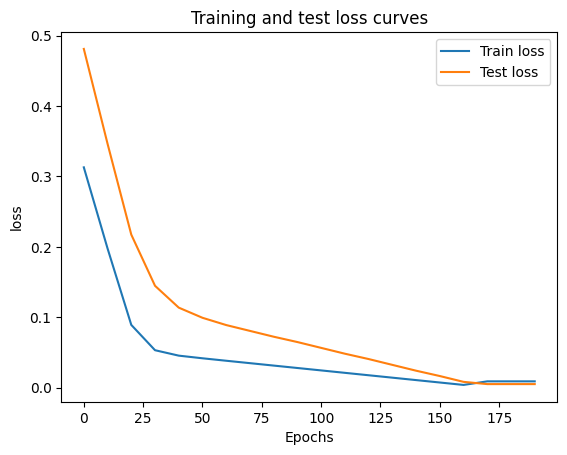

In [24]:
#plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()



In [17]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [19]:
weight, bias

(0.7, 0.3)

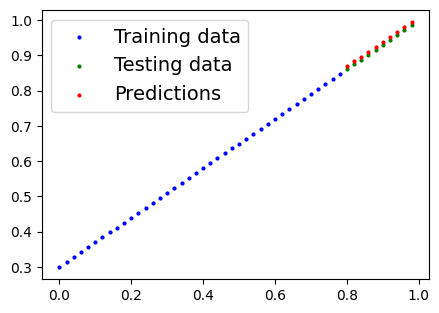

In [20]:
plot_predictions(predictions=y_preds_new)

## Saving a model in pytorch

There are three main methods for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in python's pickle format
2. `torch.load()`- allows you to load a saved PyTorch object
3. `torch.nn.module.load_state_dict()` -Loads a model's parameter dictionary using a deserialized `state_dict`- state dictionanary hence used to load a models saved state dictionary

In [25]:
#saving our pytorch model
from pathlib import Path

#1. Create a models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME= "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)



Saving model to:models/01_pytorch_workflow_model_0.pth


In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### Loading a PyTorch Model
Since we saved our models `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict` into that

In [27]:
#loading a Pytorch  model

#to load in a saved state_dict we have to instanciate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#

<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
#make some predictions

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [30]:
#compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])